In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import mutual_info_regression

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DataSet/winequality-red.csv')

In [4]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# Correlation
* measure the linear relationship b/w Input Feature and Target Varible
* range b/w  -1 to 1  ( correlation cofficient)

In [5]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


In [6]:
y = df['quality']
x = df.drop('quality',axis=1)

<Axes: >

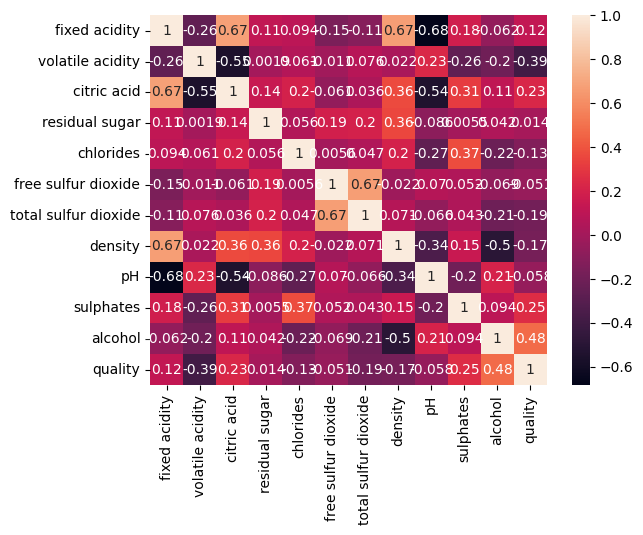

In [7]:
corr_martrix=df.corr()
sns.heatmap(df.corr(),annot=True)

# Variance Threshold
* it is a filter-based feature selectionmethod that removethe lower variance

In [8]:
data=pd.DataFrame({
    'A':[1,1,1,1,1],
    'B':[1,2,3,4,5],
    'C':[0,0,0,1,0]
})

In [13]:
vt = VarianceThreshold(threshold=0)
vt.fit(data)

VarianceThreshold(threshold=0)

In [14]:
set_features = data.columns[vt.get_support()]
set_features # leaving the low variances


Index(['B', 'C'], dtype='object')

## Working with Dataset(.csv file)

In [15]:
vt.fit(x)

VarianceThreshold(threshold=0)

In [16]:
set_features =x.columns[vt.get_support()]
set_features # leaving the low variances

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [17]:
x.shape

(1599, 11)

In [18]:
df.shape # main dataset with y value it seems no variance

(1599, 12)

# Mutual Information
 * it's measure how much inforamation one variable give about otheir

In [19]:
mi_score = mutual_info_regression(x,y)

DF = pd.DataFrame({'Features':x.columns,'Mutual Info Score':mi_score})
DF

,Features,Mutual Info Score
0,fixed acidity,0.035748
1,volatile acidity,0.134733
2,citric acid,0.066451
3,residual sugar,0.050465
4,chlorides,0.033584
5,free sulfur dioxide,0.040234
6,total sulfur dioxide,0.053705
7,density,0.085956
8,pH,0.014924
9,sulphates,0.110811
